In [1]:
import sys, time, wmi, psutil
SYSTEM_INFO = wmi.WMI().Win32_OperatingSystem()[0]
"system: {0}, {1}, {2}".format(SYSTEM_INFO.Caption, SYSTEM_INFO.BuildNumber, SYSTEM_INFO.OSArchitecture) 
"memory: {}G".format(round(psutil.virtual_memory().total / 1024**3, 2))
"cpu: {}".format(psutil.cpu_count())
"python: {}".format(sys.version)
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))

'system: Microsoft Windows 10 企业版, 18362, 64 位'

'memory: 15.86G'

'cpu: 4'

'python: 3.6.2 |Anaconda custom (64-bit)| (default, Jul 20 2017, 12:30:02) [MSC v.1900 64 bit (AMD64)]'

'2019-10-21 17:41:18'

- **@author**: run_walker
- **@references**: 
    1. [使用 python matplotlib 画矩形](https://blog.csdn.net/Eddy_zheng/article/details/52185380)

In [1]:
%matplotlib inline
import matplotlib
matplotlib.__name__, matplotlib.__version__

('matplotlib', '2.0.2')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [6]:
help(patches.Rectangle)

Help on class Rectangle in module matplotlib.patches:

class Rectangle(Patch)
 |  Draw a rectangle with lower left at *xy* = (*x*, *y*) with
 |  specified *width* and *height*.
 |  
 |  Method resolution order:
 |      Rectangle
 |      Patch
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xy, width, height, angle=0.0, **kwargs)
 |            *angle*
 |              rotation in degrees (anti-clockwise)
 |      
 |            *fill* is a boolean indicating whether to fill the rectangle
 |      
 |            Valid kwargs are:
 |              agg_filter: unknown
 |      alpha: float or None 
 |      animated: [True | False] 
 |      antialiased or aa: [True | False]  or None for default 
 |      axes: an :class:`~matplotlib.axes.Axes` instance 
 |      capstyle: ['butt' | 'round' | 'projecting'] 
 |      clip_box: a :class:`matplotlib.transforms.Bbox` instance 
 |      clip_on: [True | False] 
 |      clip_path: [ (:class:`~

# 例1

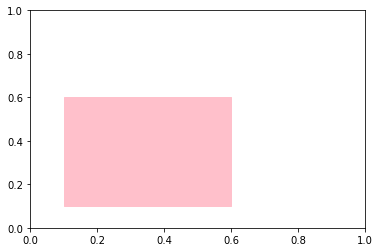

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.add_patch(
    patches.Rectangle(
        (0.1, 0.1),   # (x,y)
        0.5,          # width
        0.5,          # height
        color='pink'
    )
)

# 例2

In [33]:
def interval_list_intersection_visualization(A, B, res, figure_size=(20, 2)):
    """
    visualization for LeetCode 986 by matplotlib
    :param A: List[List]
    :param B: List[List]
    :param res: List[List]
    :return:
    """
    y0 = 0.2
    gap = 0.2
    height = 0.2
    font_size = 15
    #
    fig = plt.figure(figsize=figure_size)
    ax = fig.add_subplot(111)
    #
    xmin = min(A[0][0], B[0][0]) - 1
    xmax = max(A[-1][1], B[-1][1]) + 1
    ymin = 0
    ymax = y0 + 3 * height + 3 * gap
    plt.axis([xmin, xmax, ymin, ymax])
    plt.axis('off')
    # plt.yticks([])  # 设置y轴刻度不可见
    # frame = plt.gca()  
    # frame.axes.get_yaxis().set_visible(False)  # y 轴不可见
    # frame.axes.get_xaxis().set_visible(False)  # x 轴不可见
    #
    plt.text(xmin, y0 + 2 * height + 2 * gap, 'A', color='black', ha='center', fontsize=font_size)
    for left, right in A:
        ax.add_patch(
            patches.Rectangle(
                (left, y0 + 2 * height + 2 * gap),  # (x, y)
                right - left,  # width
                height,  # height
            )
        )
    #
    plt.text(xmin, y0 + height + gap, 'B', color='black', ha='center', fontsize=font_size)
    for left, right in B:
        ax.add_patch(
            patches.Rectangle(
                (left, y0 + height + gap),  # (x, y)
                right - left,  # width
                height,  # height
                color='yellow'
            )
        )
    #
    plt.text(xmin, y0, 'res', color='black', ha='center', fontsize=font_size)
    for left, right in res:
        ax.add_patch(
            patches.Rectangle(
                (left, y0),  # (x, y)
                right - left,  # width
                height,  # height
                color='pink'
            )
        )
    # 以文本的形式展示坐标轴
    for tick in set(sum(A, []) + sum(B, [])):
        plt.text(tick, 0, str(tick), color='black', ha='center')
        
    plt.show()

In [34]:
A = [[0, 2], [5, 10], [13, 23], [24, 25]]
B = [[1, 5], [8, 12], [15, 24], [25, 26]]
res = [[1, 2], [5, 5], [8, 10], [15, 23], [24, 24], [25, 25]]

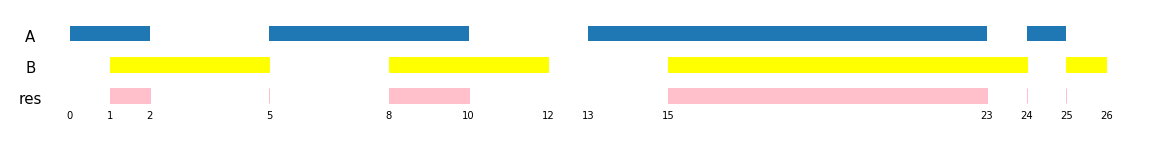

In [35]:
interval_list_intersection_visualization(A, B, res)